# Import bibliotek i ładowanie bibliotek

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import feature_selection
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('data_eda.csv')
df=df.rename(columns={'Unnamed: 0': 'index_0'})
df

,index_0,pages,stars,reviews,series,mix,character,plot,funny,lighthearted,...,author_stars,Fiction,Nonfiction,Literary,Fantasy,Crime,Social,Children,Romans,Realism
0,0,273,4.00,2017,0,0.44,0.51,0.02,0.27,0.37,...,4.305000,1,1,0,0,0,1,0,1,1
1,1,302,3.78,7330,0,0.39,0.42,0.17,0.03,0.01,...,3.670000,1,0,0,0,1,0,0,0,0
2,2,400,4.15,16761,0,0.51,0.39,0.08,0.02,0.01,...,0.000000,1,0,1,0,0,0,0,0,0
3,3,459,4.16,2128,1,0.48,0.10,0.40,0.04,0.02,...,0.000000,1,0,0,1,0,0,0,0,0
4,4,160,3.65,6634,1,0.28,0.16,0.54,0.92,0.73,...,4.115000,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,6925,432,4.15,30643,0,0.48,0.05,0.46,0.00,0.00,...,3.856667,1,0,0,1,1,0,0,0,0
6926,6926,352,3.62,1058,0,0.55,0.13,0.30,0.15,0.10,...,3.700000,1,0,0,1,0,1,0,0,0
6927,6927,535,3.88,30975,1,0.45,0.08,0.45,0.14,0.19,...,3.870000,1,0,0,1,0,0,1,0,0
6928,6928,472,3.88,5914,1,0.64,0.12,0.22,0.07,0.00,...,3.660000,1,0,0,1,0,0,1,0,0


$\text{Posiłkując się informacjami z EDA przeprowadzimy Feature Engineering.}$<p>

In [3]:
categorical_features = ['series', 'Fiction', 'Nonfiction', 'Literary', 'Fantasy','Crime',
       'Social', 'Children', 'Romans', 'Realism']
target = "stars"
continous_features = df.columns.difference(categorical_features + [target]+['index_0']).tolist()
features=df.columns.difference([target]+['index_0']).tolist()

# Mutual information

$\text{W pierwszym kroku sprawdzamy jak dostępne zmienne informują nas o zmiennej objaśnianej za pomocą mutual information.}$<p>

In [4]:
minfos_1={}

for var in features:
    minfos_1[var] = round(feature_selection.mutual_info_regression(df[var].values.reshape(-1,1),df[target].values)[0],20)
    
minfos_1=dict(sorted(minfos_1.items(), key=lambda item: item[1], reverse=True))
minfos_1

{'author_stars': 0.28051790505961405,
 'inspiring': 0.14462469299923963,
 'mix': 0.1373470002180781,
 'emotional': 0.12573445853583554,
 'hopeful': 0.10431072458871427,
 'mysterious': 0.09402192928252973,
 'character': 0.07769728159924938,
 'challenging': 0.0757562376743861,
 'adventurous': 0.06976470717348882,
 'informative': 0.06926246387434709,
 'dark': 0.06864319051920109,
 'plot': 0.06761234708684771,
 'reflective': 0.06606303377805123,
 'tense': 0.05667593582900122,
 'sad': 0.055839948360381975,
 'funny': 0.05089454647115854,
 'Nonfiction': 0.04046440554625752,
 'lighthearted': 0.038879989173264295,
 'pages': 0.03284536398250193,
 'Fiction': 0.03194481519409509,
 'reviews': 0.031653601599428205,
 'Social': 0.020349632296258857,
 'relaxing': 0.017473138026294688,
 'Crime': 0.01439050687664123,
 'author_count': 0.011428510346439325,
 'Literary': 0.00806937723422485,
 'Romans': 0.005672002782128427,
 'series': 0.004908833587250472,
 'Fantasy': 0.0019372499880823124,
 'Realism': 0.00

$\text{Zmienne o bardzo niskiej wartości MI: Literary, Children, Realism oraz series.}$<p>

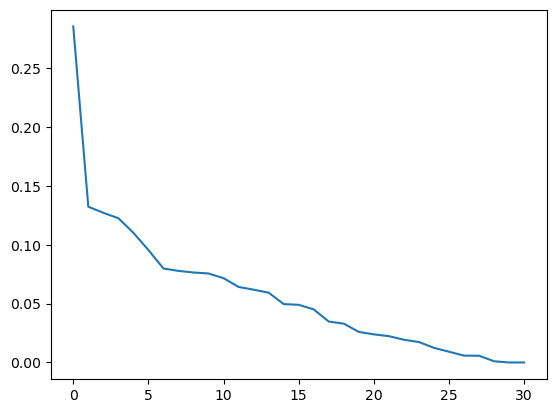

In [14]:
plt.plot(minfos_1.values())

# Interakcje zmiennych

$\text{Więc następnie zobaczymy czy przy interakcji zmiennych kategorycznych i numerycznych utworzymy zmienne, które dobrze wyjaśniają zmienna objaśnianą.}$<p>

In [5]:
df_add=df.copy()

In [6]:
import warnings
warnings.filterwarnings("ignore")

for category in categorical_features:
    for continous in continous_features:
        df_add["{}_{}".format(category,continous)]=df_add[category]*df_add[continous]
    
features_all=df_add.columns.difference([target]+['index_0']).tolist()

In [7]:
minfos_2={}

for var in features_all:
    minfos_2[var] = round(feature_selection.mutual_info_regression(df_add[var].values.reshape(-1,1),df_add[target].values)[0],20)
    
minfos_2=dict(sorted(minfos_2.items(), key=lambda item: item[1], reverse=True))
minfos_2

{'author_stars': 0.287872438414551,
 'Fiction_author_stars': 0.23875176749501306,
 'Fiction_emotional': 0.1429822420343312,
 'Fiction_mix': 0.12974899833278375,
 'inspiring': 0.12953251749064343,
 'mix': 0.12517223906264618,
 'emotional': 0.12086113941287914,
 'series_author_stars': 0.1139371746359652,
 'Fantasy_author_stars': 0.09996424245061064,
 'hopeful': 0.0982103434738182,
 'mysterious': 0.09643128353372354,
 'Fiction_inspiring': 0.09138186626169631,
 'Fiction_mysterious': 0.08914748105575931,
 'Literary_author_stars': 0.08881663852369792,
 'Fiction_adventurous': 0.08480898117889968,
 'challenging': 0.0832046635167627,
 'Fiction_hopeful': 0.08019478754143972,
 'adventurous': 0.07946790173286544,
 'informative': 0.07779220691495725,
 'character': 0.07660887730204546,
 'Social_author_stars': 0.07175541072543168,
 'Literary_emotional': 0.07052714506408897,
 'Fiction_character': 0.07046900335464734,
 'Fiction_challenging': 0.06999056985320884,
 'Fiction_plot': 0.06917260233504496,
 '

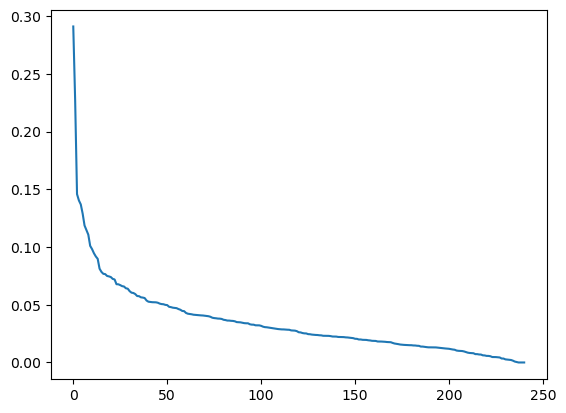

In [18]:
plt.plot(minfos_2.values())

$\text{Na podstawie analizy wykresu odetniemy zmienne z interakcją, które dodamy do zbioru na poziomie MI=0.05.}$<p>

In [8]:
categories=[]
for i,j in minfos_2.items():
    if j>0.05:
        categories.append(i)
print(categories)

['author_stars', 'Fiction_author_stars', 'Fiction_emotional', 'Fiction_mix', 'inspiring', 'mix', 'emotional', 'series_author_stars', 'Fantasy_author_stars', 'hopeful', 'mysterious', 'Fiction_inspiring', 'Fiction_mysterious', 'Literary_author_stars', 'Fiction_adventurous', 'challenging', 'Fiction_hopeful', 'adventurous', 'informative', 'character', 'Social_author_stars', 'Literary_emotional', 'Fiction_character', 'Fiction_challenging', 'Fiction_plot', 'Fiction_tense', 'Fantasy_mix', 'series_mix', 'Nonfiction_author_stars', 'plot', 'dark', 'reflective', 'sad', 'Fiction_reflective', 'Literary_inspiring', 'Fiction_sad', 'Fiction_dark', 'tense', 'series_emotional', 'Fantasy_inspiring', 'Literary_sad', 'Literary_mysterious', 'Nonfiction_challenging', 'Fantasy_adventurous', 'Literary_mix', 'series_adventurous', 'Crime_mix', 'Nonfiction_hopeful', 'Romans_author_stars']


$\text{Po dodaniu zmiennych w interakcji widzimy, że zmienna series lepiej informuje o zmiennej objaśnianej w interakcji ze zmienną author_stars, mix, emotional oraz adventurous.}$<p>
$\text{Zmienna Literary sama mało informująca o wartości zmiennej objaśnianej w interkacji ze zmiennymi: author_stars, emotional inspiring, sad, mysterious oraz mix o wiele lepiej objaśnia zmienną.}$<p>
$\text{Niestety w przypadku zmiennych Children i Realism nie uzyskaliśmy tak wyraźnej nie uzyskaliśmy poprawy.}$<p>

In [9]:
df_new=df_add.copy()
for column in df_add.columns:
    if column not in categories:
        df_new = df_new.drop(columns=[column])
cols_to_use = df_new.columns.difference(df.columns)
df_add = pd.merge(df, df_new[cols_to_use], left_index=True, right_index=True, how='outer')
#zapisujemy plik z interakcjami zmiennych
df_add.to_csv('data_add.csv')

# Transformacja zmiennych ciągłych

$\text{Przechodząc do zmiennych ciągłych widzimy, że zmienne relaxing, reviews oraz pages nadal mało informują o zmiennej objaśniającej.}$<p>
$\text{Znając ich rozkłady z EDA wiemy, że relaxing jest prawostronnie skośny, tak samo jak reviews, a zmienna pages również ma długi prawy ogon.}$<p>
$\text{Zaczniemy więc od transformacji logarytmicznej.}$<p>

In [14]:
df_log=df.copy()
for column in continous_features:
    df_log["{}_log".format(column)]=np.log(df_log[column].replace(0, np.nan))
    df_log["{}_log".format(column)]=df_log["{}_log".format(column)].replace(np.nan,0)

features_log=df_log.columns.difference(features_all+[target]+['index_0']).tolist()

minfos_3={}

for var in features_log+continous_features:
    minfos_3[var] = round(feature_selection.mutual_info_regression(df_log[var].values.reshape(-1,1),df_log[target].values)[0],20)
    
minfos_3=dict(sorted(minfos_3.items(), key=lambda item: item[1], reverse=True))
minfos_3

{'author_stars_log': 0.29442791178348937,
 'author_stars': 0.2906385973855925,
 'inspiring': 0.1355176641391891,
 'mix': 0.1321022651693351,
 'inspiring_log': 0.13168297953853347,
 'mix_log': 0.12771839655877404,
 'emotional': 0.12114878071124835,
 'emotional_log': 0.11988382461252288,
 'hopeful_log': 0.10873207942576,
 'hopeful': 0.09825850591686347,
 'mysterious': 0.08723301621152935,
 'reviews_log': 0.08615360856986332,
 'mysterious_log': 0.07897184461842954,
 'challenging': 0.0779646229543447,
 'character_log': 0.07690410921757795,
 'informative': 0.07660447898455747,
 'reflective': 0.07058525855338971,
 'challenging_log': 0.07040440593263142,
 'informative_log': 0.06969072495110007,
 'plot_log': 0.06958183048927946,
 'adventurous_log': 0.06707915282997323,
 'character': 0.06643188971458347,
 'reflective_log': 0.06594030001788909,
 'dark': 0.06469344267028276,
 'adventurous': 0.06456251132713575,
 'plot': 0.06394854380277071,
 'sad_log': 0.05765322416192032,
 'author_count_log': 0.

$\text{Poprawa jedynie dla zmiennych: reviews_log, challenging_log, character_log, sad_log, lighthearted_log, lecz dla zmiennej reviews znaczna.}$<p>
$\text{Użyjemy dlatego bardziej zaawansowanych transformacji zmiennych, gdyż nadal większość zmiennych ciągłych ma rozkład prawostronny.}$<p>
$\text{Mianowicie metod: Boxcox, Standard Scaler, Robust Scaler, MinMaxScaler, QuantileTransformer.}$<p>

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

df_trans=df_log.copy()
for column in continous_features:
    df_trans[column]=df_trans[column].replace(0, np.nan)
    df_trans=df_trans.sort_values(by=[column]).reset_index(drop=True)
    df_trans["{}_boxcox".format(column)]=0
    df_trans["{}_boxcox".format(column)][df_trans[column].first_valid_index():df_trans[column].last_valid_index()+1], _=stats.boxcox(df_trans[column][df_trans[column].first_valid_index():df_trans[column].last_valid_index()+1])
    df_trans=df_trans.sort_values(by=[column]).reset_index(drop=True)
    df_trans["{}_boxcox".format(column)]=df_trans["{}_boxcox".format(column)]*-1
    df_trans[column]=df_trans[column].replace(np.nan,0)

df_trans=df_trans.sort_values(by=['index_0']).reset_index(drop=True)

df_trans_ss=df.copy()
df_trans_ss=StandardScaler().fit_transform(df_trans_ss[continous_features])
df_trans_ss=pd.DataFrame(data=df_trans_ss,index=range(0,6930),columns=[s + "_ss" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_ss,left_index=True, right_index=True, how='outer')   

df_trans_rs=df.copy()
df_trans_rs=RobustScaler().fit_transform(df_trans_rs[continous_features])
df_trans_rs=pd.DataFrame(data=df_trans_rs,index=range(0,6930),columns=[s + "_rs" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_rs,left_index=True, right_index=True, how='outer')   

df_trans_mm=df.copy()
df_trans_mm=MinMaxScaler().fit_transform(df_trans_mm[continous_features])
df_trans_mm=pd.DataFrame(data=df_trans_mm,index=range(0,6930),columns=[s + "_mm" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_mm,left_index=True, right_index=True, how='outer')   

df_trans_qt=df.copy()
df_trans_qt=QuantileTransformer().fit_transform(df_trans_qt[continous_features])
df_trans_qt=pd.DataFrame(data=df_trans_qt,index=range(0,6930),columns=[s + "_qt" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_qt,left_index=True, right_index=True, how='outer') 

features_trans=df_trans.columns.difference([target]+['index_0']).tolist()

minfos_4={}

for var in features_trans:
    minfos_4[var] = round(feature_selection.mutual_info_regression(df_trans[var].values.reshape(-1,1),df_trans[target].values)[0],20)
    
minfos_4=dict(sorted(minfos_4.items(), key=lambda item: item[0], reverse=True))
minfos_4   

{'tense_ss': 0.05788995143932851,
 'tense_rs': 0.058595428785954695,
 'tense_qt': 0.04908552708006919,
 'tense_mm': 0.052905425634307335,
 'tense_log': 0.04346133427061094,
 'tense_boxcox': 0.05750443982964715,
 'tense': 0.05369738232576982,
 'series': 0.00513749087339499,
 'sad_ss': 0.05493095104747071,
 'sad_rs': 0.05475149509149091,
 'sad_qt': 0.05446439236173273,
 'sad_mm': 0.051982387553803015,
 'sad_log': 0.05405825260600494,
 'sad_boxcox': 0.05398060363476809,
 'sad': 0.04599736629697215,
 'reviews_ss': 0.07835318483454135,
 'reviews_rs': 0.0789377626179153,
 'reviews_qt': 0.08575388342860268,
 'reviews_mm': 0.08078750464506435,
 'reviews_log': 0.08909161556330414,
 'reviews_boxcox': 0.08676977070996639,
 'reviews': 0.03431455578540521,
 'relaxing_ss': 0.01658667785863921,
 'relaxing_rs': 0.016908654405688672,
 'relaxing_qt': 0.011057890297907935,
 'relaxing_mm': 0.012398253903859844,
 'relaxing_log': 0.017235379510816884,
 'relaxing_boxcox': 0.019837313563019432,
 'relaxing': 0

$\text{Widzimy poprawę dla prawie wszystkich zmiennych ciągłych.}$<p>

In [58]:
continous_transformations=['tense_rs', 'sad_mm', 'reviews_boxcox','relaxing_boxcox', 
'reflective_boxcox', 'plot_qt', 'pages_qt', 'mysterious_rs','mix_qt',
'lighthearted_mm','inspiring_log','informative_boxcox','hopeful_rs',
'funny_qt','emotional_boxcox','dark_ss', 'character_ss','challenging_mm',
'author_stars','author_count_ss','adventurous_qt']
df_ = pd.merge(df[categorical_features + [target]+['index_0']], df_trans[continous_transformations], left_index=True, right_index=True, how='outer')
df_

,series,Fiction,Nonfiction,Literary,Fantasy,Crime,Social,Children,Romans,Realism,...,informative_boxcox,hopeful_rs,funny_qt,emotional_boxcox,dark_ss,character_ss,challenging_mm,author_stars,author_count_ss,adventurous_qt
0,0,1,1,0,0,0,1,0,1,1,...,6.656129,1.730769,0.687187,0.091363,-1.087573,0.719774,0.072917,4.305000,-0.229402,0.378378
1,0,1,0,0,0,1,0,0,0,0,...,-0.000000,-0.500000,0.280280,1.014531,1.023268,0.380380,0.093750,3.670000,-0.372598,0.309309
2,0,1,0,1,0,0,0,0,0,0,...,2.620342,0.846154,0.230230,0.122459,-0.777155,0.267249,0.187500,0.000000,-0.515794,0.544044
3,1,1,0,0,1,0,0,0,0,0,...,3.789578,-0.384615,0.320320,1.233107,-0.466738,-0.826353,0.156250,0.000000,-0.515794,0.937437
4,1,1,0,0,1,0,0,0,0,0,...,6.656129,-0.384615,0.987988,-0.000000,-1.056531,-0.600091,0.000000,4.115000,3.207294,0.829329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,0,1,0,0,1,1,0,0,0,0,...,3.506684,-0.192308,0.000000,0.682787,0.526599,-1.014905,0.354167,3.856667,0.343380,0.766767
6926,0,1,0,0,1,0,1,0,0,0,...,2.197277,2.153846,0.571071,0.899293,-0.839239,-0.713222,0.312500,3.700000,-0.229402,0.766767
6927,1,1,0,0,1,0,0,1,0,0,...,-0.000000,0.500000,0.555556,0.808695,-0.404654,-0.901774,0.052083,3.870000,-0.229402,0.952953
6928,1,1,0,0,1,0,0,1,0,0,...,-0.000000,-0.346154,0.412412,0.737477,1.582020,-0.750932,0.291667,3.660000,-0.372598,0.776777


$\text{Powtórzymy procedurę wyboru interkacji zmiennych dla przetransformowanych zmiennych ciągłych.}$<p>

In [59]:
df_added=df_.copy()

categorical_features = ['series', 'Fiction', 'Nonfiction', 'Literary', 'Fantasy','Crime',
       'Social', 'Children', 'Romans', 'Realism']
target = "stars"
continous_features = df_.columns.difference(categorical_features + [target]+['index_0']).tolist()
features=df_.columns.difference([target]+['index_0']).tolist()

for category in categorical_features:
    for continous in continous_features:
        df_added["{}_{}".format(category,continous)]=df_added[category]*df_added[continous]
    
features_all=df_added.columns.difference([target]+['index_0']).tolist()

In [60]:
minfos_5={}

for var in features_all:
    minfos_5[var] = round(feature_selection.mutual_info_regression(df_added[var].values.reshape(-1,1),df_added[target].values)[0],20)
    
minfos_5=dict(sorted(minfos_5.items(), key=lambda item: item[1], reverse=True))
minfos_5

{'author_stars': 0.2895446318925363,
 'Fiction_author_stars': 0.2371508604642445,
 'Fiction_emotional_boxcox': 0.14655829576289658,
 'inspiring_log': 0.13403726501760804,
 'Fiction_mix_qt': 0.13030143912537007,
 'mix_qt': 0.12787204935185148,
 'Fiction_hopeful_rs': 0.11562515705149057,
 'series_author_stars': 0.11556514303187713,
 'emotional_boxcox': 0.1144685409577395,
 'Fantasy_author_stars': 0.10615798582357659,
 'hopeful_rs': 0.10392849484270529,
 'Fiction_reviews_boxcox': 0.10101678414769212,
 'mysterious_rs': 0.09212771311040502,
 'Literary_author_stars': 0.09087192665521604,
 'plot_qt': 0.08754996260025738,
 'Fiction_adventurous_qt': 0.08543763625572076,
 'challenging_mm': 0.08263683584438297,
 'Fiction_mysterious_rs': 0.08250734791002134,
 'reviews_boxcox': 0.08247799536387745,
 'Fiction_plot_qt': 0.08120428374178701,
 'Fiction_author_count_ss': 0.07926983552342959,
 'Social_author_stars': 0.07847756024402419,
 'Fiction_inspiring_log': 0.07834030614576326,
 'Fiction_dark_ss': 0

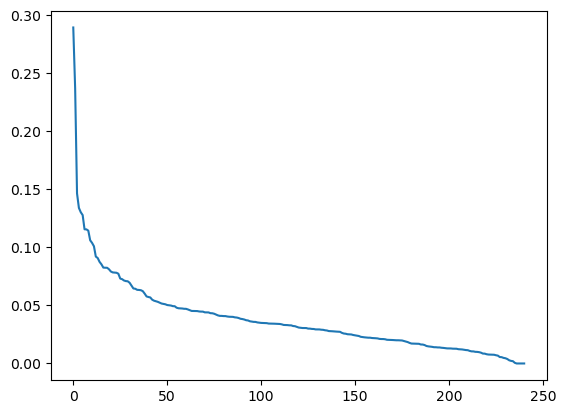

In [61]:
plt.plot(minfos_5.values())

In [62]:
categories=[]
for i,j in minfos_5.items():
    if j>0.05:
        categories.append(i)
print(categories)

['author_stars', 'Fiction_author_stars', 'Fiction_emotional_boxcox', 'inspiring_log', 'Fiction_mix_qt', 'mix_qt', 'Fiction_hopeful_rs', 'series_author_stars', 'emotional_boxcox', 'Fantasy_author_stars', 'hopeful_rs', 'Fiction_reviews_boxcox', 'mysterious_rs', 'Literary_author_stars', 'plot_qt', 'Fiction_adventurous_qt', 'challenging_mm', 'Fiction_mysterious_rs', 'reviews_boxcox', 'Fiction_plot_qt', 'Fiction_author_count_ss', 'Social_author_stars', 'Fiction_inspiring_log', 'Fiction_dark_ss', 'Fiction_character_ss', 'Fantasy_mix_qt', 'adventurous_qt', 'dark_ss', 'Fiction_pages_qt', 'Literary_emotional_boxcox', 'Fiction_tense_rs', 'character_ss', 'Literary_mix_qt', 'Literary_mysterious_rs', 'Fiction_challenging_mm', 'series_mix_qt', 'informative_boxcox', 'reflective_boxcox', 'Nonfiction_author_stars', 'Literary_hopeful_rs', 'series_emotional_boxcox', 'Literary_inspiring_log', 'Fantasy_inspiring_log', 'Fiction_reflective_boxcox', 'Social_challenging_mm', 'Nonfiction_challenging_mm', 'Nonfi

In [63]:
df_new=df_added.copy()
for column in df_added.columns:
    if column not in categories:
        df_new = df_new.drop(columns=[column])
cols_to_use = df_new.columns.difference(df_.columns)
df_added = pd.merge(df_, df_new[cols_to_use], left_index=True, right_index=True, how='outer')
#zapisujemy plik z interakcjami zmiennych
df_added.to_csv('data_added.csv')
df_added

,series,Fiction,Nonfiction,Literary,Fantasy,Crime,Social,Children,Romans,Realism,...,Nonfiction_author_count_ss,Nonfiction_author_stars,Nonfiction_challenging_mm,Nonfiction_dark_ss,Social_author_stars,Social_challenging_mm,series_author_stars,series_emotional_boxcox,series_inspiring_log,series_mix_qt
0,0,1,1,0,0,0,1,0,1,1,...,-0.229402,4.305,0.072917,-1.087573,4.305,0.072917,0.000,0.000000,-0.000000,0.000000
1,0,1,0,0,0,1,0,0,0,0,...,-0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000
2,0,1,0,1,0,0,0,0,0,0,...,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,0.000,0.000000,-0.000000,0.000000
3,1,1,0,0,1,0,0,0,0,0,...,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,0.000,1.233107,-3.506558,0.646146
4,1,1,0,0,1,0,0,0,0,0,...,0.000000,0.000,0.000000,-0.000000,0.000,0.000000,4.115,-0.000000,-4.605170,0.345846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,0,1,0,0,1,1,0,0,0,0,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,-0.000000,0.000000
6926,0,1,0,0,1,0,1,0,0,0,...,-0.000000,0.000,0.000000,-0.000000,3.700,0.312500,0.000,0.000000,-0.000000,0.000000
6927,1,1,0,0,1,0,0,1,0,0,...,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,3.870,0.808695,-1.714798,0.593093
6928,1,1,0,0,1,0,0,1,0,0,...,-0.000000,0.000,0.000000,0.000000,0.000,0.000000,3.660,0.737477,0.000000,0.931932


# Feature selection

$\text{Mamy obecnie bardzo dużo zmiennych i pewnie liczba tych skorelowanych ze sobą się zwiększyła:.}$<p>

In [64]:
features_all=df_added.columns.difference([target]+['index_0']).tolist()
i = 0
while(i < len(features_all)):
    j = i+1
    while(j < len(features_all)):
        if(stats.spearmanr(df_added[features_all[i]], df_added[features_all[j]]).pvalue < 0.05 and
          stats.spearmanr(df_added[features_all[i]], df_added[features_all[j]]).statistic>0.79):
            print("Korelacja między {} i {} jest statystycznie istotna i wynosi: {}.".format(features_all[i], features_all[j], round(stats.spearmanr(df_added[features_all[i]], df_added[features_all[j]]).statistic, 3)))
        j = j + 1
    i = i + 1

Korelacja między Fantasy i Fantasy_author_stars jest statystycznie istotna i wynosi: 0.79.
Korelacja między Fantasy i Fantasy_mix_qt jest statystycznie istotna i wynosi: 0.966.
Korelacja między Fiction_adventurous_qt i adventurous_qt jest statystycznie istotna i wynosi: 0.952.
Korelacja między Fiction_author_count_ss i author_count_ss jest statystycznie istotna i wynosi: 0.849.
Korelacja między Fiction_author_stars i author_stars jest statystycznie istotna i wynosi: 0.868.
Korelacja między Fiction_character_ss i character_ss jest statystycznie istotna i wynosi: 0.807.
Korelacja między Fiction_dark_ss i Fiction_tense_rs jest statystycznie istotna i wynosi: 0.822.
Korelacja między Fiction_dark_ss i dark_ss jest statystycznie istotna i wynosi: 0.905.
Korelacja między Fiction_hopeful_rs i hopeful_rs jest statystycznie istotna i wynosi: 0.928.
Korelacja między Fiction_inspiring_log i inspiring_log jest statystycznie istotna i wynosi: 0.918.
Korelacja między Fiction_mix_qt i mix_qt jest stat

In [66]:
minfos_6={}

for var in features_all:
    minfos_6[var] = round(feature_selection.mutual_info_regression(df_added[var].values.reshape(-1,1),df_added[target].values)[0],20)
    
minfos_6=dict(sorted(minfos_6.items(), key=lambda item: item[1], reverse=True))
minfos_6

{'author_stars': 0.28859520329697075,
 'Fiction_author_stars': 0.23461737360422766,
 'Fiction_emotional_boxcox': 0.13773112531077203,
 'Fiction_mix_qt': 0.13450768328634055,
 'Fiction_hopeful_rs': 0.13127920198254284,
 'inspiring_log': 0.12965417762100806,
 'mix_qt': 0.12290291318161549,
 'series_author_stars': 0.12231829518520021,
 'emotional_boxcox': 0.1138650692191181,
 'Fantasy_author_stars': 0.1111070861771064,
 'hopeful_rs': 0.10503234909341419,
 'Fiction_reviews_boxcox': 0.10266010583189146,
 'Literary_author_stars': 0.09513691004528903,
 'Fiction_adventurous_qt': 0.09363769675158551,
 'mysterious_rs': 0.09235580657635811,
 'Fiction_mysterious_rs': 0.08918853572085084,
 'reviews_boxcox': 0.08660510226349771,
 'Fiction_inspiring_log': 0.08644630245357643,
 'challenging_mm': 0.08144170882435553,
 'Fiction_author_count_ss': 0.07986070258728395,
 'Fiction_character_ss': 0.07832910206557031,
 'Fiction_dark_ss': 0.07769111226742442,
 'Fantasy_mix_qt': 0.07444645605675726,
 'informativ

$\text{Na podstwie dwóch powyższych informacji warto usunąć kolumny: Fantasy, adventurous_qt, author_count_ss,}$<p>
$\text{character_ss, hopeful_rs, mix_qt, pages_qt, plot_qt, Nonfiction, Social,}$<p>
$\text{Fiction_author_stars, Fiction_tense_rs, Fiction_dark_ss, Fiction_inspiring_log, Fiction_mysterious_rs,}$<p>
$\text{Fiction_reflective_boxcox, Fiction_reviews_boxcox, Fiction_sad_mm,}$<p>
$\text{Literary_challenging_mm, Literary_mix_qt, series_emotional_boxcox, series}$<p>

In [72]:
correlated=['Fantasy', 'adventurous_qt', 'author_count_ss',
'character_ss', 'hopeful_rs', 'mix_qt', 'pages_qt', 'plot_qt','Nonfiction', 'Social',
'Fiction_author_stars', 'Fiction_tense_rs', 'Fiction_dark_ss', 'Fiction_inspiring_log', 'Fiction_mysterious_rs',
'Fiction_reflective_boxcox', 'Fiction_reviews_boxcox', 'Fiction_sad_mm',
'Literary_challenging_mm', 'Literary_mix_qt', 'series_emotional_boxcox', 'series']
df_fin = df_added.drop(columns=correlated)
df_fin

,Fiction,Literary,Crime,Children,Romans,Realism,stars,index_0,tense_rs,sad_mm,...,Literary_mysterious_rs,Nonfiction_author_count_ss,Nonfiction_author_stars,Nonfiction_challenging_mm,Nonfiction_dark_ss,Social_author_stars,Social_challenging_mm,series_author_stars,series_inspiring_log,series_mix_qt
0,1,0,0,0,1,1,4.00,0,0.026490,0.127660,...,-0.000000,-0.229402,4.305,0.072917,-1.087573,4.305,0.072917,0.000,-0.000000,0.000000
1,1,0,1,0,0,0,3.78,1,1.139073,0.053191,...,0.000000,-0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000
2,1,1,0,0,0,0,4.15,2,-0.264901,0.361702,...,0.480769,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,0.000,-0.000000,0.000000
3,1,0,0,0,0,0,4.16,3,0.794702,0.000000,...,0.000000,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,0.000,-3.506558,0.646146
4,1,0,0,0,0,0,3.65,4,-0.529801,0.000000,...,-0.000000,0.000000,0.000,0.000000,-0.000000,0.000,0.000000,4.115,-4.605170,0.345846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,1,0,1,0,0,0,4.15,6925,1.324503,0.170213,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,-0.000000,0.000000
6926,1,0,0,0,0,0,3.62,6926,-0.185430,0.042553,...,-0.000000,-0.000000,0.000,0.000000,-0.000000,3.700,0.312500,0.000,-0.000000,0.000000
6927,1,0,0,1,0,0,3.88,6927,0.000000,0.053191,...,0.000000,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,3.870,-1.714798,0.593093
6928,1,0,0,1,0,0,3.88,6928,1.456954,0.234043,...,0.000000,-0.000000,0.000,0.000000,0.000000,0.000,0.000000,3.660,0.000000,0.931932


In [73]:
features_all=df_fin.columns.difference([target]+['index_0']).tolist()
minfos_7={}

for var in features_all:
    minfos_7[var] = round(feature_selection.mutual_info_regression(df_fin[var].values.reshape(-1,1),df_fin[target].values)[0],20)
    
minfos_7=dict(sorted(minfos_7.items(), key=lambda item: item[1], reverse=True))
minfos_7

{'author_stars': 0.2796096077745127,
 'Fiction_mix_qt': 0.13961145346182846,
 'Fiction_emotional_boxcox': 0.13380596616872165,
 'inspiring_log': 0.13007198820115562,
 'Fiction_hopeful_rs': 0.12019892279948952,
 'series_author_stars': 0.11603307494803382,
 'Fantasy_author_stars': 0.11583980073989775,
 'emotional_boxcox': 0.11335556526682479,
 'mysterious_rs': 0.096380298642333,
 'reviews_boxcox': 0.0893015126277854,
 'Fiction_author_count_ss': 0.08561759017431259,
 'Fiction_plot_qt': 0.0851010783486732,
 'Literary_author_stars': 0.08206158071367486,
 'challenging_mm': 0.08090233827137894,
 'Fantasy_mix_qt': 0.07811707648619981,
 'Fiction_adventurous_qt': 0.07302744067678191,
 'Social_author_stars': 0.07146074401905356,
 'Fiction_character_ss': 0.07099193728974296,
 'informative_boxcox': 0.0699277178447053,
 'Fiction_pages_qt': 0.06731787107230502,
 'Fiction_challenging_mm': 0.06701449989467001,
 'dark_ss': 0.06593262829782987,
 'Literary_emotional_boxcox': 0.06467832998985745,
 'series_

$\text{Jedyne zmienne o niskiej wartości MI to: Literary, Romans, Children, Realism, Crime, Fiction, lighthearted_mm i relaxing_boxcox}$<p>    
$\text{Przy czym Literary oraz Fiction znajdują się w interakcji z innymi zmiennymi w bazie danych, więc zdecydowano się usunąć te zmienne.}$<p>
$\text{Niestety nie znaleziono sposobu aby poprawić dopasowanie zmiennych Children oraz Realism.}$<p>
$\text{Lecz z EDA wiemy, że średnio książki z tych kategorii są ocenane podobnie jak spoza kategorii, więc zdecydowano się usunąć te zmienne.}$<p>
$\text{Dla zmiennych Romans i Crime wiemy, że książki z tych kategorii są średnio oceniane niżej niż spoza, więc zdecydowano się zostawić te zmienne.}$<p>

In [74]:
df_fin = df_fin.drop(columns=['Children','Realism','Fiction','Literary'])
df_fin

,Crime,Romans,stars,index_0,tense_rs,sad_mm,reviews_boxcox,relaxing_boxcox,reflective_boxcox,mysterious_rs,...,Literary_mysterious_rs,Nonfiction_author_count_ss,Nonfiction_author_stars,Nonfiction_challenging_mm,Nonfiction_dark_ss,Social_author_stars,Social_challenging_mm,series_author_stars,series_inspiring_log,series_mix_qt
0,0,1,4.00,0,0.026490,0.127660,-3.068275,3.000523,1.646322,-0.346154,...,-0.000000,-0.229402,4.305,0.072917,-1.087573,4.305,0.072917,0.000,-0.000000,0.000000
1,1,0,3.78,1,1.139073,0.053191,-3.186688,-0.000000,2.233287,1.192308,...,0.000000,-0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000
2,0,0,4.15,2,-0.264901,0.361702,-3.242326,5.692911,0.392250,0.480769,...,0.480769,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,0.000,-0.000000,0.000000
3,0,0,4.16,3,0.794702,0.000000,-3.074123,5.692911,1.810515,0.750000,...,0.000000,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,0.000,-3.506558,0.646146
4,0,0,3.65,4,-0.529801,0.000000,-3.179029,2.832315,2.121079,-0.269231,...,-0.000000,0.000000,0.000,0.000000,-0.000000,0.000,0.000000,4.115,-4.605170,0.345846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,1,0,4.15,6925,1.324503,0.170213,-3.275273,-0.000000,0.975520,0.769231,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,-0.000000,0.000000
6926,0,0,3.62,6926,-0.185430,0.042553,-2.990217,4.679955,0.847566,-0.230769,...,-0.000000,-0.000000,0.000,0.000000,-0.000000,3.700,0.312500,0.000,-0.000000,0.000000
6927,0,0,3.88,6927,0.000000,0.053191,-3.275811,3.433351,2.233287,0.596154,...,0.000000,-0.000000,0.000,0.000000,-0.000000,0.000,0.000000,3.870,-1.714798,0.593093
6928,0,0,3.88,6928,1.456954,0.234043,-3.169931,-0.000000,1.946763,0.615385,...,0.000000,-0.000000,0.000,0.000000,0.000000,0.000,0.000000,3.660,0.000000,0.931932


In [75]:
features_all=df_fin.columns.difference([target]+['index_0']).tolist()
i = 0
while(i < len(features_all)):
    j = i+1
    while(j < len(features_all)):
        if(stats.spearmanr(df_fin[features_all[i]], df_fin[features_all[j]]).pvalue < 0.05 and
          stats.spearmanr(df_fin[features_all[i]], df_fin[features_all[j]]).statistic>0.79):
            print("Korelacja między {} i {} jest statystycznie istotna i wynosi: {}.".format(features_all[i], features_all[j], round(stats.spearmanr(df_fin[features_all[i]], df_fin[features_all[j]]).statistic, 3)))
        j = j + 1
    i = i + 1

Korelacja między dark_ss i tense_rs jest statystycznie istotna i wynosi: 0.845.
Korelacja między funny_qt i lighthearted_mm jest statystycznie istotna i wynosi: 0.8.


$\text{Zmienne dark_ss i tense_rs są skolerowane, więc zdecydowano się je połączyć w jedną zmienną wyrażającą ich sumę.}$<p>
$\text{Tak samo ze zmiennymi funny_qt i lighthearted_mm dodatkowo dodając zmienną relaxing_boxcox.}$<p>

In [76]:
df_fin['lighthearted_mm_funny_qt']=df_fin['lighthearted_mm']+df_fin['funny_qt']
df_fin['lighthearted_mm_relaxing_boxcox']=df_fin['lighthearted_mm']+df_fin['relaxing_boxcox']
df_fin['tense_rs_dark_ss']=df_fin['dark_ss']+df_fin['tense_rs']

minfos_8={}

for var in ['tense_rs_dark_ss','dark_ss','tense_rs','lighthearted_mm_relaxing_boxcox','lighthearted_mm_funny_qt','lighthearted_mm','relaxing_boxcox','funny_qt']:
    minfos_8[var] = round(feature_selection.mutual_info_regression(df_fin[var].values.reshape(-1,1),df_fin[target].values)[0],20)
    
minfos_8=dict(sorted(minfos_8.items(), key=lambda item: item[1], reverse=True))
minfos_8

{'tense_rs_dark_ss': 0.08558693185749089,
 'lighthearted_mm_funny_qt': 0.06960951636305968,
 'dark_ss': 0.05671567944786471,
 'funny_qt': 0.05628869187990393,
 'tense_rs': 0.05054355872156435,
 'lighthearted_mm_relaxing_boxcox': 0.04649127148719145,
 'lighthearted_mm': 0.036935014817792045,
 'relaxing_boxcox': 0.010058770680582363}

$\text{Widzimy, że uzyskujemy poprawę przy połączeniu zmiennych, zoabczymy czy zmiana proporcji zgodnie z modelem regresji pomoże jeszcze bardziej zwiększyć MI.}$<p>

In [88]:
from sklearn import linear_model
df_fin['lighthearted_mm_relaxing_boxcox']=linear_model.LinearRegression().fit(df_fin[['lighthearted_mm','relaxing_boxcox']],df_fin[target]).coef_[0]*df_fin['lighthearted_mm']+linear_model.LinearRegression().fit(df_fin[['lighthearted_mm','relaxing_boxcox']],df_fin[target]).coef_[1]*df_fin['relaxing_boxcox']
df_fin['lighthearted_mm_funny_qt']=linear_model.LinearRegression().fit(df_fin[['lighthearted_mm','funny_qt']],df_fin[target]).coef_[0]*df_fin['lighthearted_mm']+linear_model.LinearRegression().fit(df_fin[['lighthearted_mm','funny_qt']],df_fin[target]).coef_[1]*df_fin['funny_qt']
df_fin['tense_rs_dark_ss']=linear_model.LinearRegression().fit(df_fin[['tense_rs','dark_ss']],df_fin[target]).coef_[0]*df_fin['tense_rs']+linear_model.LinearRegression().fit(df_fin[['tense_rs','dark_ss']],df_fin[target]).coef_[1]*df_fin['dark_ss']


df_fin['lighthearted_mm__funny_qt']=df_fin['lighthearted_mm']+df_fin['funny_qt']
df_fin['lighthearted_mm__relaxing_boxcox']=df_fin['lighthearted_mm']+df_fin['relaxing_boxcox']
df_fin['tense_rs__dark_ss']=df_fin['dark_ss']+df_fin['tense_rs']


minfos_9={}

for var in ['tense_rs__dark_ss','tense_rs_dark_ss','dark_ss','tense_rs','lighthearted_mm__relaxing_boxcox','lighthearted_mm__funny_qt','lighthearted_mm_relaxing_boxcox','lighthearted_mm_funny_qt','lighthearted_mm','relaxing_boxcox','funny_qt']:
    minfos_9[var] = round(feature_selection.mutual_info_regression(df_fin[var].values.reshape(-1,1),df_fin[target].values)[0],20)
    
minfos_9=dict(sorted(minfos_9.items(), key=lambda item: item[1], reverse=True))
minfos_9

{'tense_rs_dark_ss': 0.10696110420015348,
 'tense_rs__dark_ss': 0.0822825094568902,
 'lighthearted_mm__funny_qt': 0.07174832102044171,
 'lighthearted_mm__relaxing_boxcox': 0.06151252086577941,
 'dark_ss': 0.061150526978132724,
 'lighthearted_mm_funny_qt': 0.05961562226720307,
 'tense_rs': 0.056202376537092036,
 'lighthearted_mm_relaxing_boxcox': 0.055514772342753815,
 'funny_qt': 0.043084966051913476,
 'lighthearted_mm': 0.041197895940926266,
 'relaxing_boxcox': 0.01888892643557938}

$\text{Zostawimy sumę lighthearted_mm i funny_qt oraz lighthearted_mm i relaxing_boxcox, przy tense_rs i dark_ss poprawa przy zastosowaniu wag.}$<p>

In [98]:
df_fin = df_fin.drop(columns=['tense_rs__dark_ss','dark_ss','tense_rs','lighthearted_mm_relaxing_boxcox','lighthearted_mm_funny_qt','lighthearted_mm','relaxing_boxcox','funny_qt'])
df_fin

,Crime,Romans,stars,sad_mm,reviews_boxcox,reflective_boxcox,mysterious_rs,inspiring_log,informative_boxcox,emotional_boxcox,...,Nonfiction_challenging_mm,Nonfiction_dark_ss,Social_author_stars,Social_challenging_mm,series_author_stars,series_inspiring_log,series_mix_qt,lighthearted_mm__relaxing_boxcox,tense_rs_dark_ss,lighthearted_mm__funny_qt
0,0,1,4.00,0.127660,-3.068275,1.646322,-0.346154,-1.049822,6.656129,0.091363,...,0.072917,-1.087573,4.305,0.072917,0.000,-0.000000,0.000000,3.370523,0.060776,1.057187
1,1,0,3.78,0.053191,-3.186688,2.233287,1.192308,0.000000,-0.000000,1.014531,...,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.010000,-0.008842,0.290280
2,0,0,4.15,0.361702,-3.242326,0.392250,0.480769,-1.272966,2.620342,0.122459,...,0.000000,-0.000000,0.000,0.000000,0.000,-0.000000,0.000000,5.702911,0.031642,0.240230
3,0,0,4.16,0.000000,-3.074123,1.810515,0.750000,-3.506558,3.789578,1.233107,...,0.000000,-0.000000,0.000,0.000000,0.000,-3.506558,0.646146,5.712911,0.058614,0.340320
4,0,0,3.65,0.000000,-3.179029,2.121079,-0.269231,-4.605170,6.656129,-0.000000,...,0.000000,-0.000000,0.000,0.000000,4.115,-4.605170,0.345846,3.562315,0.035970,1.717988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,1,0,4.15,0.170213,-3.275273,0.975520,0.769231,-3.506558,3.506684,0.682787,...,0.000000,0.000000,0.000,0.000000,0.000,-0.000000,0.000000,0.000000,0.026111,0.000000
6926,0,0,3.62,0.042553,-2.990217,0.847566,-0.230769,-1.049822,2.197277,0.899293,...,0.000000,-0.000000,3.700,0.312500,0.000,-0.000000,0.000000,4.779955,0.038349,0.671071
6927,0,0,3.88,0.053191,-3.275811,2.233287,0.596154,-1.714798,-0.000000,0.808695,...,0.000000,-0.000000,0.000,0.000000,3.870,-1.714798,0.593093,3.623351,0.022204,0.745556
6928,0,0,3.88,0.234043,-3.169931,1.946763,0.615385,0.000000,-0.000000,0.737477,...,0.000000,0.000000,0.000,0.000000,3.660,0.000000,0.931932,0.000000,-0.026300,0.412412


In [100]:
features_all=df_fin.columns.difference([target]+['index_0']).tolist()
minfos_10={}

for var in features_all:
    minfos_10[var] = round(feature_selection.mutual_info_regression(df_fin[var].values.reshape(-1,1),df_fin[target].values)[0],20)
    
minfos_10=dict(sorted(minfos_10.items(), key=lambda item: item[1], reverse=True))
minfos_10

{'author_stars': 0.28789981891257765,
 'Fiction_emotional_boxcox': 0.1435692949032088,
 'Fiction_hopeful_rs': 0.13414287143755388,
 'inspiring_log': 0.13164588655579035,
 'Fiction_mix_qt': 0.13134780634653787,
 'emotional_boxcox': 0.12103410659460678,
 'series_author_stars': 0.11677318370043599,
 'tense_rs_dark_ss': 0.1073706014578022,
 'Fantasy_author_stars': 0.10682706568460265,
 'mysterious_rs': 0.09593958700368965,
 'Literary_author_stars': 0.08531298288170985,
 'reviews_boxcox': 0.08519414923331148,
 'Fiction_adventurous_qt': 0.08414570527066534,
 'challenging_mm': 0.0832045226291287,
 'Social_author_stars': 0.08091706512075869,
 'Fiction_author_count_ss': 0.07978217701356805,
 'Fiction_plot_qt': 0.07560867113963621,
 'lighthearted_mm__funny_qt': 0.07478948916480022,
 'informative_boxcox': 0.07172348032340592,
 'Fantasy_mix_qt': 0.07037347448145237,
 'Fiction_character_ss': 0.0703113264655073,
 'Literary_emotional_boxcox': 0.06907325902876016,
 'Fiction_pages_qt': 0.06843554666059

$\text{Dalsza feature selection zostanie przeprowadzona osobno dla każdego z modeli.}$<p>

In [101]:
df_fin.to_csv('data_fe.csv')